In [ ]:
# --- 1. LIBRARIES IMPORT ---
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LinearRegression

# --- 2. VISUALIZATION SETTINGS ---
sns.set_theme(
    style="whitegrid",
    rc={
        "figure.facecolor": "white",
        "figure.edgecolor": "white",
        "axes.facecolor": "white",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "black",
        "ytick.color": "black",
        "text.color": "black",
        "grid.color": "#E5E5E5" 
    }
)

In [2]:
file_path = "datixprjDV.xlsx"   
raw = pd.read_excel(file_path, header=None)
raw.head()


,0,1,2,3,4,5
0,Time,NaN,2006.0,NaN,NaN,NaN
1,SEX (Labels),Total,NaN,Males,NaN,Females
2,GEO (Labels),NaN,NaN,NaN,NaN,NaN
3,European Union - 27 countries (from 2020),10.7,NaN,11.44,NaN,9.92
4,European Union - 28 countries (2013-2020),:,NaN,:,NaN,:


In [3]:
rows = []
n = raw.shape[0]
sex_row_idx = raw[0].astype(str).str.strip().eq("SEX (Labels)").idxmax()
sex_row = raw.iloc[sex_row_idx]
sex_map = {
    1: sex_row[1],  # "Total"
    3: sex_row[3],  # "Males"
    5: sex_row[5],  # "Females"
}
i = 0
while i < n:
    cell0 = str(raw.iloc[i, 0]).strip() if pd.notna(raw.iloc[i, 0]) else ""
    if cell0 == "Time":
        year = str(raw.iloc[i, 2]).strip()
        j = i + 1
        if j < n and str(raw.iloc[j, 0]).strip() == "SEX (Labels)":
            j += 2  # skip SEX (Labels) + GEO (Labels)
        elif j < n and str(raw.iloc[j, 0]).strip() == "GEO (Labels)":
            j += 1  # skip only GEO (Labels)

        # Now j points to the first country-row of the block
        while j < n:
            geo_cell = raw.iloc[j, 0]

            if not isinstance(geo_cell, str):
                break
            geo = geo_cell.strip()
            if geo == "" or geo == "Time":
                break

            # Create a row for each sex (Total, Males, Females)
            for col_idx, sex in sex_map.items():
                val = raw.iloc[j, col_idx]

                if isinstance(val, str):
                    v = val.strip()
                    if v == ":":
                        value = np.nan
                    else:
                        # from "10,7" to "10.7"
                        v = v.replace(",", ".")
                        value = pd.to_numeric(v, errors="coerce")
                else:
                    value = pd.to_numeric(val, errors="coerce")
                rows.append({
                    "year": year,
                    "geo": geo,
                    "sex": sex,
                    "value": value
                })
            j += 1
        i = j
    else:
        i += 1

tidy = pd.DataFrame(rows)
tidy.head(20)

,year,geo,sex,value
0,2006.0,European Union - 27 countries (from 2020),Total,10.70
1,2006.0,European Union - 27 countries (from 2020),Males,11.44
2,2006.0,European Union - 27 countries (from 2020),Females,9.92
3,2006.0,European Union - 28 countries (2013-2020),Total,NaN
4,2006.0,European Union - 28 countries (2013-2020),Males,NaN
5,2006.0,European Union - 28 countries (2013-2020),Females,NaN
6,2006.0,European Union - 27 countries (2007-2013),Total,11.43
7,2006.0,European Union - 27 countries (2007-2013),Males,12.28
8,2006.0,European Union - 27 countries (2007-2013),Females,10.56
9,2006.0,Euro area – 20 countries (from 2023),Total,NaN


In [4]:

tidy["year"] = (
    tidy["year"]
    .astype(str)                
    .str.extract(r"(\d{4})")[0] 
    .astype("Int64")            
)
tidy["year"].unique(), tidy["year"].dtype


(<IntegerArray>
 [2006, 2010, 2014, 2018, 2022]
 Length: 5, dtype: Int64,
 Int64Dtype())

# Generating datasets divided by year in order to proceed to parsing"
### problem:missing value


In [5]:
year = 2022
pivot_2022 = tidy[tidy["year"] == year].pivot(
    index="geo",
    columns="sex",
    values="value"
)
year = 2018
pivot_2018 = tidy[tidy["year"] == year].pivot(
    index="geo",
    columns="sex",
    values="value"
)
year = 2014
pivot_2014 = tidy[tidy["year"] == year].pivot(
    index="geo",
    columns="sex",
    values="value"
)
year = 2010
pivot_2010 = tidy[tidy["year"] == year].pivot(
    index="geo",
    columns="sex",
    values="value"
)
year = 2006
pivot_2006 = tidy[tidy["year"] == year].pivot(
    index="geo",
    columns="sex",
    values="value"
)


In [6]:
print("2022:", pivot_2022.head(50))
print("2006:", pivot_2006.head(50))
print("2010:", pivot_2010.head(50))
print("2014:", pivot_2014.head(50))
print("2018:", pivot_2018.head(50))

2022: sex                                        Females  Males  Total
geo                                                             
Albania                                       2.63   2.39   2.47
Austria                                      15.78  18.96  17.65
Belgium                                      23.74  23.94  23.84
Bosnia and Herzegovina                        4.77   4.87   4.83
Bulgaria                                      4.05   4.04   4.05
Croatia                                       6.65   6.96   6.82
Cyprus                                        8.62   9.77   9.31
Czechia                                       7.59   8.85   8.23
Denmark                                      28.29  31.78  29.83
Estonia                                       8.63  10.37   9.38
Euro area - 17 countries (2011-2013)           NaN    NaN    NaN
Euro area - 18 countries (2014)                NaN    NaN    NaN
Euro area - 19 countries  (2015-2022)        15.50  16.98  16.26
Euro area – 20 coun

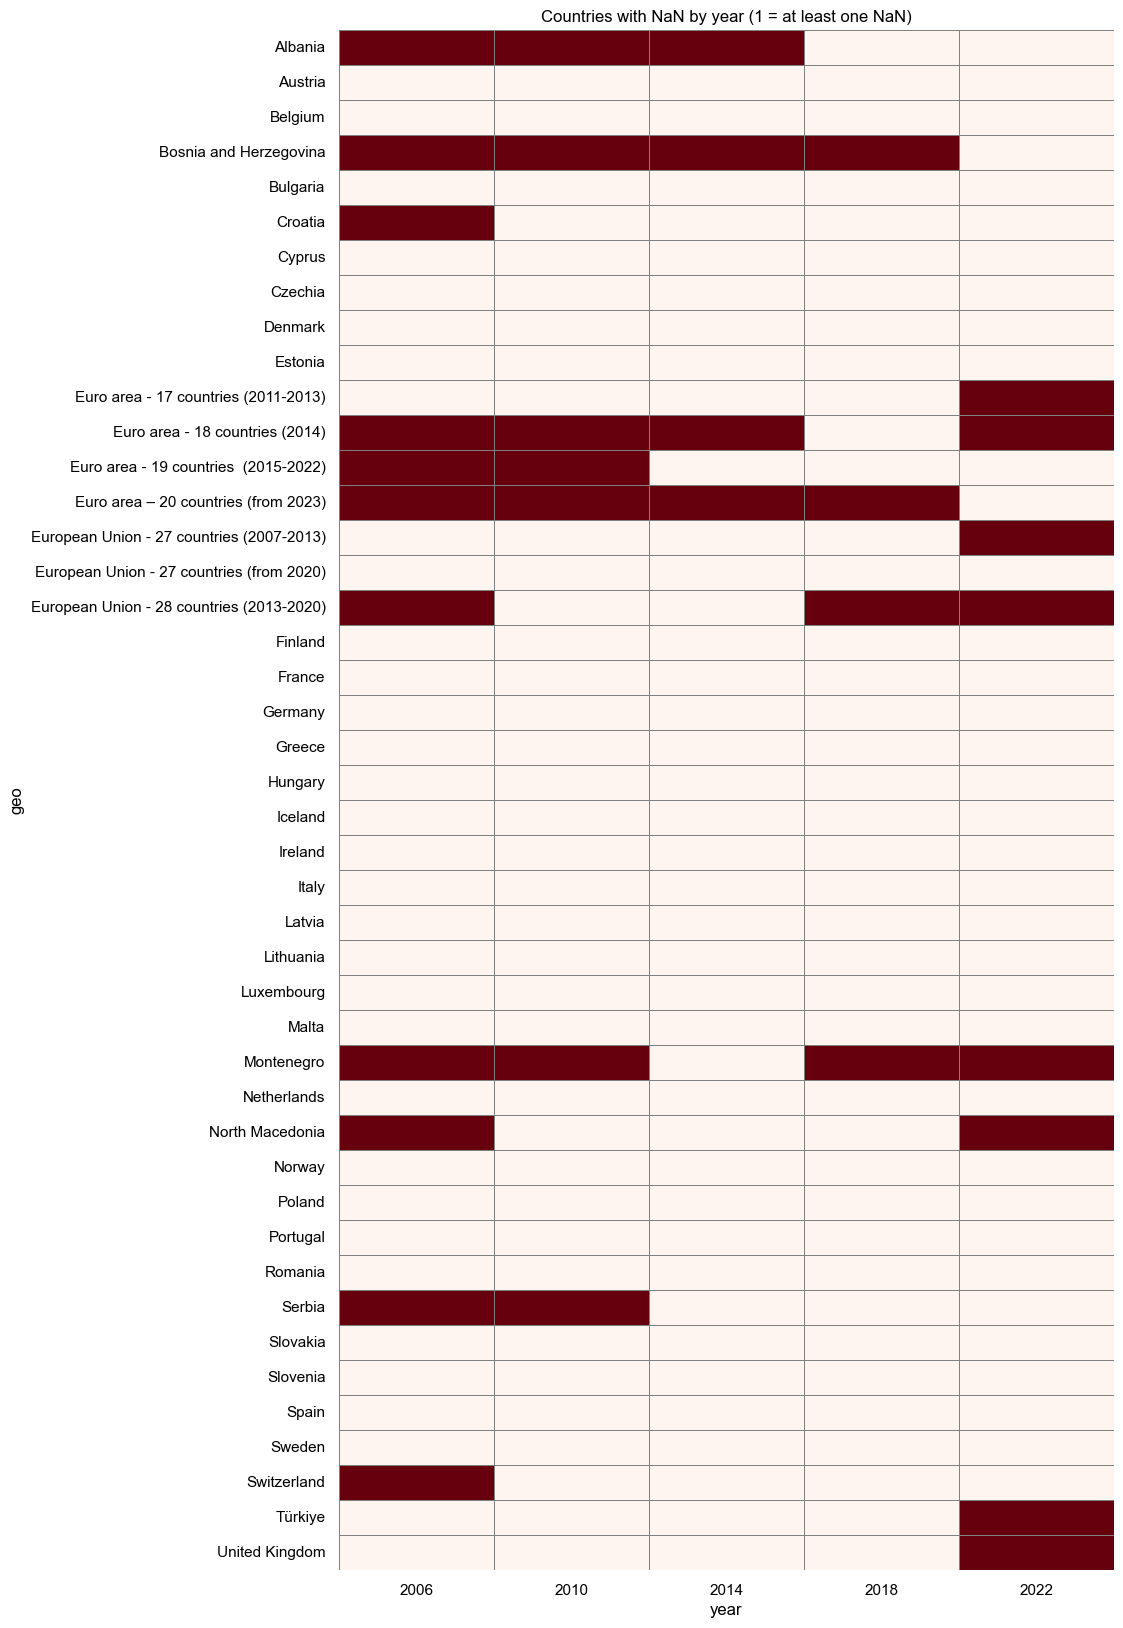

In [7]:

heat_tidy = tidy.pivot_table(index="geo", columns="year", values="value", aggfunc=lambda x: x.isna().sum())
# True per NaN → 1, False → 0
heat_tidy = (heat_tidy > 0).astype(int)
plt.figure(figsize=(10, 20))
sns.heatmap(heat_tidy, cmap="Reds", linewidths=0.5, linecolor="gray", cbar=False)
plt.title("Countries with NaN by year (1 = at least one NaN)")
plt.show()


In [8]:
aggregates = [
    "European Union - 27 countries (from 2020)",
    "European Union - 28 countries (2013-2020)",
    "European Union - 27 countries (2007-2013)",
    "Euro area – 20 countries (from 2023)",
    "Euro area - 19 countries  (2015-2022)",
    "Euro area - 18 countries (2014)",
    "Euro area - 17 countries (2011-2013)"
]

countries_df = tidy[~tidy["geo"].isin(aggregates)].reset_index(drop=True)
zones_df     = tidy[ tidy["geo"].isin(aggregates)].reset_index(drop=True)

print("Paesi reali:", countries_df["geo"].nunique())
print("Macro-aree:", zones_df["geo"].nunique())


Paesi reali: 37
Macro-aree: 7


In [9]:
countries_df.head()


,year,geo,sex,value
0,2006,Belgium,Total,14.27
1,2006,Belgium,Males,14.60
2,2006,Belgium,Females,13.76
3,2006,Bulgaria,Total,0.80
4,2006,Bulgaria,Males,0.80


In [10]:
print(zones_df)

     year                                        geo      sex  value
0    2006  European Union - 27 countries (from 2020)    Total  10.70
1    2006  European Union - 27 countries (from 2020)    Males  11.44
2    2006  European Union - 27 countries (from 2020)  Females   9.92
3    2006  European Union - 28 countries (2013-2020)    Total    NaN
4    2006  European Union - 28 countries (2013-2020)    Males    NaN
..    ...                                        ...      ...    ...
100  2022            Euro area - 18 countries (2014)    Males    NaN
101  2022            Euro area - 18 countries (2014)  Females    NaN
102  2022       Euro area - 17 countries (2011-2013)    Total    NaN
103  2022       Euro area - 17 countries (2011-2013)    Males    NaN
104  2022       Euro area - 17 countries (2011-2013)  Females    NaN

[105 rows x 4 columns]


In [11]:
countries_wide = countries_df.pivot_table(
    index=["year", "geo"],
    columns="sex",
    values="value"
).reset_index()

countries_wide = countries_wide.rename(columns={
    "Females": "females",
    "Males": "males",
    "Total": "total"
})

countries_wide.head()


sex,year,geo,females,males,total
0,2006,Austria,9.75,12.82,11.65
1,2006,Belgium,13.76,14.60,14.27
2,2006,Bulgaria,0.79,0.80,0.80
3,2006,Cyprus,7.09,10.33,8.81
4,2006,Czechia,3.15,3.86,3.56


In [12]:
zones_wide = zones_df.pivot_table(
    index=["year", "geo"],
    columns="sex",
    values="value",
).reset_index()

zones_wide = zones_wide.rename(columns={
    "Females": "females",
    "Males": "males",
    "Total": "total"
})
zones_wide = zones_wide.round(2)
print(zones_wide)


sex  year                                        geo  females  males  total
0    2006       Euro area - 17 countries (2011-2013)    11.31  12.97  12.22
1    2006  European Union - 27 countries (2007-2013)    10.56  12.28  11.43
2    2006  European Union - 27 countries (from 2020)     9.92  11.44  10.70
3    2010       Euro area - 17 countries (2011-2013)    12.37  14.14  13.29
4    2010  European Union - 27 countries (2007-2013)    11.16  12.96  12.07
5    2010  European Union - 27 countries (from 2020)    10.99  12.58  11.82
6    2010  European Union - 28 countries (2013-2020)    11.15  12.95  12.06
7    2014       Euro area - 17 countries (2011-2013)    13.26  15.18  14.25
8    2014      Euro area - 19 countries  (2015-2022)    13.07  15.01  14.08
9    2014  European Union - 27 countries (2007-2013)    12.16  14.06  13.11
10   2014  European Union - 27 countries (from 2020)    11.83  13.51  12.69
11   2014  European Union - 28 countries (2013-2020)    12.19  14.09  13.14
12   2018   

## STEP 1 — Removing Montenegro, Bosnia and Albania
-> Bosnia and Albania have data coverage of less than 40%; including them would introduce statistical distortions. Therefore, they have been excluded from the analysis.

In [13]:
to_drop = ["Bosnia and Herzegovina", "Albania", "Montenegro"]

countries_clean = countries_df[~countries_df["geo"].isin(to_drop)].reset_index(drop=True)

print("Removed:", to_drop)
print("New number of countries:", countries_clean['geo'].nunique())


Removed: ['Bosnia and Herzegovina', 'Albania', 'Montenegro']
New number of countries: 34


## STEP 2 — Identifying missing values by sex
-> Impute missing data for the remaining locations (conditional on sex) by leveraging the available data for that country, using the median.

In [14]:
clusters = {
    "west_north": [
        "Austria","Belgium","Denmark","Finland","France",
        "Germany","Iceland","Ireland","Luxembourg","Netherlands",
        "Norway","Sweden","Switzerland","United Kingdom"
    ],
    "mediterranean": [
        "Italy","Spain","Greece","Portugal","Cyprus","Malta"
    ],
    "east_central": [
        "Estonia","Latvia","Lithuania","Poland","Czechia",
        "Slovakia","Hungary","Romania","Bulgaria","Slovenia","Croatia"
    ],
    "balkan_candidate": [
        "Serbia","North Macedonia","Türkiye"
    ]
}


In [15]:


countries_reg_cluster = countries_clean.copy()

# Predictive regression cluster-based
for s in ["Females", "Males", "Total"]:
    for cl_name, cl_countries in clusters.items():

        # same sex and same cluster subset
        sub = countries_reg_cluster[
            (countries_reg_cluster["sex"] == s) &
            (countries_reg_cluster["geo"].isin(cl_countries))
        ]

        # dividing complete e missing
        complete = sub.dropna(subset=["value"])
        missing  = sub[sub["value"].isna()]

        if len(missing) == 0:
            continue  

        # x=year, y=value
        X = complete["year"].values.reshape(-1, 1)
        y = complete["value"].values

        # linear regression model for the imputation
        model = LinearRegression()
        model.fit(X, y)

        # imputation for missing
        X_missing = missing["year"].values.reshape(-1, 1)
        preds = model.predict(X_missing)

        countries_reg_cluster.loc[
            (countries_reg_cluster["sex"] == s) &
            (countries_reg_cluster["geo"].isin(cl_countries)) &
            (countries_reg_cluster["value"].isna()),
            "value"
        ] = preds

In [16]:
countries_reg_cluster.head()

,year,geo,sex,value
0,2006,Belgium,Total,14.27
1,2006,Belgium,Males,14.60
2,2006,Belgium,Females,13.76
3,2006,Bulgaria,Total,0.80
4,2006,Bulgaria,Males,0.80


# Preparing a gender pay gap metric
Il gender pay gap è definito come Gender Pay Gap (%) = (Male earnings – Female earnings) / Male earnings × 100
).


In [17]:
def prepare_gap_df(countries_reg_cluster: pd.DataFrame) -> pd.DataFrame:
    """
    Returns a tidy DataFrame with:
    year, geo, male_pay, female_pay, total_pay, gap_pct
    """
    # Pivot to have one row per year+country
    pivot = countries_reg_cluster.pivot_table(
        index=["year", "geo"],
        columns="sex",
        values="value"
    ).reset_index()

    # Some datasets use 'Males'/'Females', some use 'Male'/'Female', etc.
    # Try to be a bit robust.
    male_col = [c for c in pivot.columns if str(c).lower().startswith("male")][0]
    female_col = [c for c in pivot.columns if str(c).lower().startswith("female")][0]

    pivot = pivot.rename(columns={
        male_col: "male_pay",
        female_col: "female_pay",
        "Total": "total_pay" if "Total" in pivot.columns else "Total"
    })

    # Compute gender pay gap (%)
    pivot["gap_pct"] = (pivot["male_pay"] - pivot["female_pay"]) / pivot["male_pay"] * 100

    return pivot


In [18]:
gap_df = prepare_gap_df(countries_reg_cluster)
gap_df.head()


sex,year,geo,female_pay,male_pay,total_pay,gap_pct
0,2006,Austria,9.750000,12.820000,11.650,23.946958
1,2006,Belgium,13.760000,14.600000,14.270,5.753425
2,2006,Bulgaria,0.790000,0.800000,0.800,1.250000
3,2006,Croatia,2.260769,2.567308,2.405,11.940075
4,2006,Cyprus,7.090000,10.330000,8.810,31.364956


In [19]:
gap_df.sort_values(by=["gap_pct"], ascending=False, inplace=True)

In [20]:
gap_df.head()

sex,year,geo,female_pay,male_pay,total_pay,gap_pct
4,2006,Cyprus,7.09,10.33,8.81,31.364956
7,2006,Estonia,2.54,3.56,2.91,28.651685
75,2014,Estonia,4.32,5.86,4.91,26.279863
41,2010,Estonia,3.59,4.79,4.09,25.052192
0,2006,Austria,9.75,12.82,11.65,23.946958


# Heatmap across years & countries


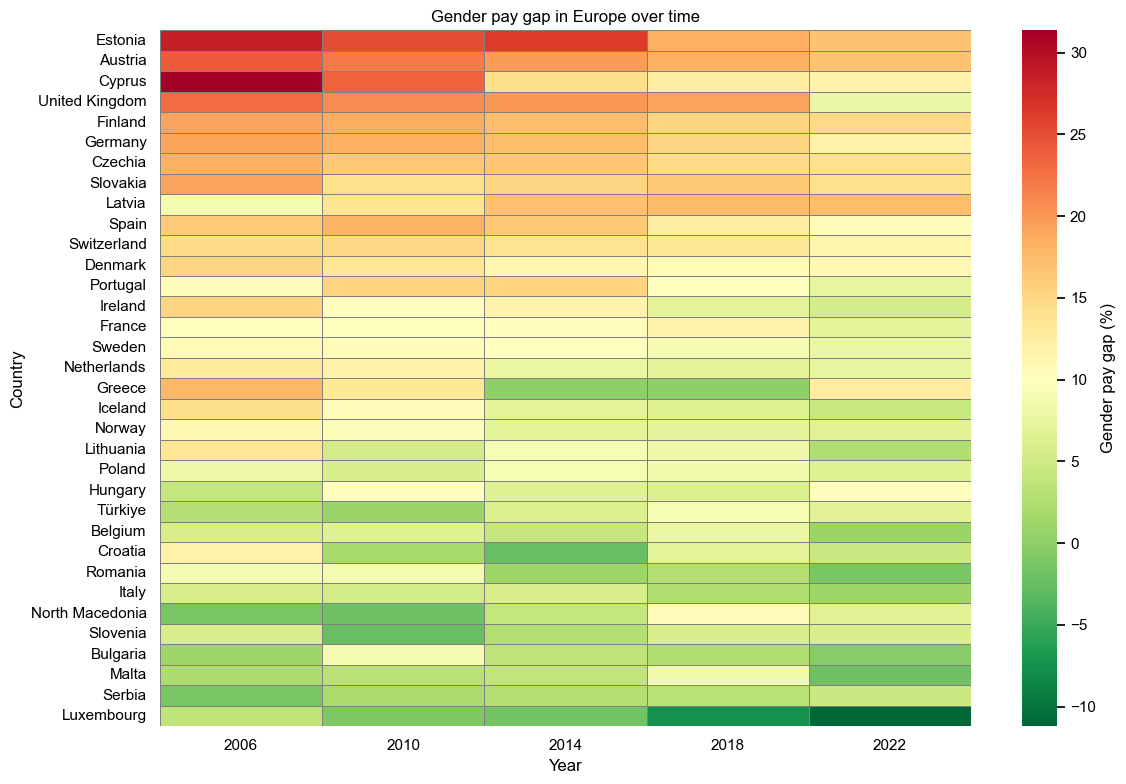

In [21]:
def plot_gap_heatmap(gap_df: pd.DataFrame, countries_order=None):
    # Pivot: rows = countries, columns = years
    heat = gap_df.pivot(
        index="geo",
        columns="year",
        values="gap_pct"
    )
    if countries_order is None:
        countries_order = heat.mean(axis=1).sort_values(ascending=False).index
    heat = heat.loc[countries_order]

    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(
        heat,
        cmap="RdYlGn_r",  # red = high gap, green = low gap
        linewidths=0.5,
        linecolor="grey",
        cbar_kws={"label": "Gender pay gap (%)"}
    )
    ax.set_title("Gender pay gap in Europe over time")
    ax.set_xlabel("Year")
    ax.set_ylabel("Country")
    plt.tight_layout()
    plt.show()

plot_gap_heatmap(gap_df)


# A simple EU vs countries comparison from zones_df


In [22]:
!pip install adjustText

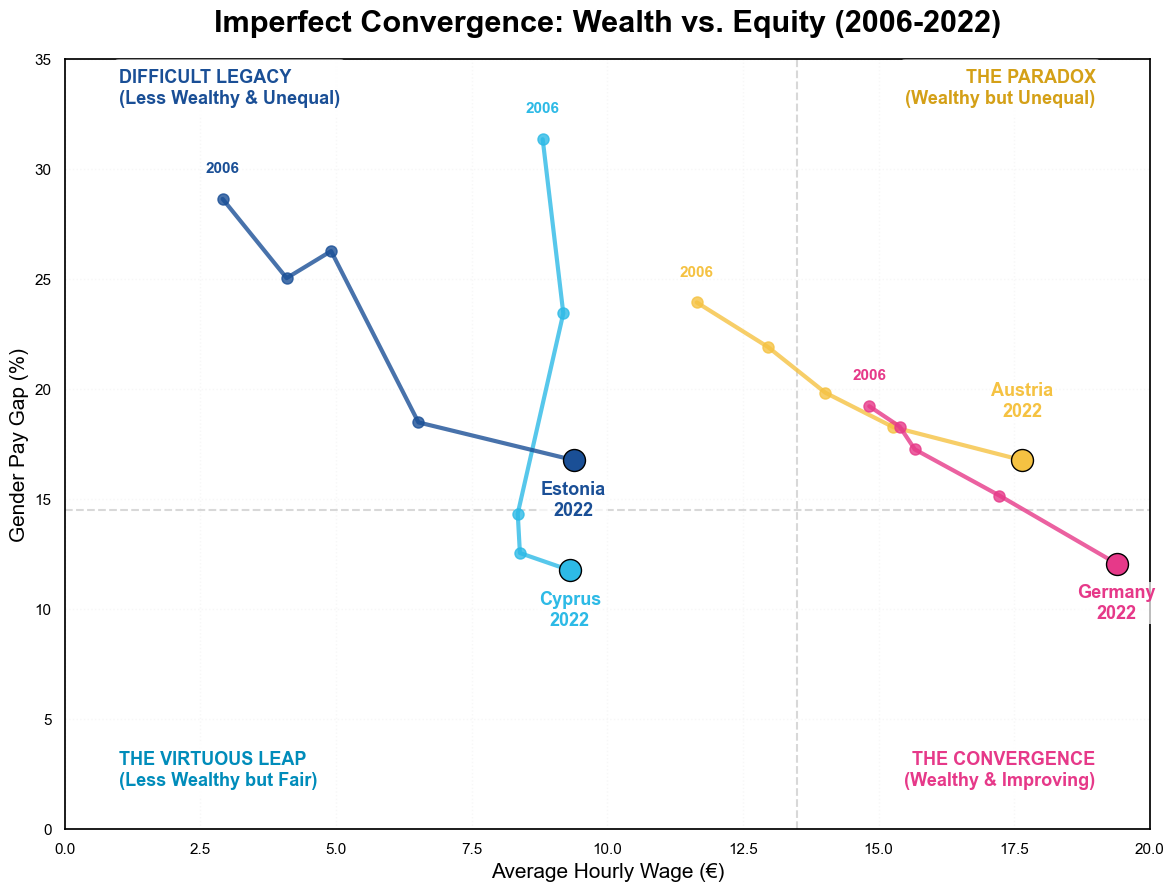

In [23]:
target_countries = ['Austria', 'Germany', 'Cyprus', 'Estonia']
filtered_df = gap_df[gap_df['geo'].isin(target_countries)].copy()

# --- 2. CONFIGURAZIONE COLORI ---
colors = {
    'Austria': '#F5C242',  # Giallo Oro
    'Germany': '#E63989',  # Rosa Fucsia
    'Cyprus':  '#2DBAE6',  # Azzurro Ciano
    'Estonia': '#1A4F96'   # Blu Scuro
}
filtered_df['color'] = filtered_df['geo'].map(colors)

plt.figure(figsize=(14, 10))

plt.xlim(0, 20) 
plt.ylim(0, 35)

plt.axhline(y=14.5, color='gray', linestyle='--', alpha=0.3)
plt.axvline(x=13.5, color='gray', linestyle='--', alpha=0.3)

bbox_props = dict(facecolor='white', alpha=0.9, edgecolor='none', boxstyle='round,pad=0.5')


# Austria 
plt.text(19, 33, "THE PARADOX\n(Wealthy but Unequal)", 
         color='#D4A017', 
         fontsize=13, ha='right', fontweight='bold', bbox=bbox_props)

# Germaniy
plt.text(19, 2, "THE CONVERGENCE\n(Wealthy & Improving)", 
         color=colors['Germany'], 
         fontsize=13, ha='right', fontweight='bold', bbox=bbox_props)

# Estonia 
plt.text(1, 33, "DIFFICULT LEGACY\n(Less Wealthy & Unequal)", 
         color=colors['Estonia'], 
         fontsize=13, ha='left', fontweight='bold', bbox=bbox_props)

# Cyprus
plt.text(1, 2, "THE VIRTUOUS LEAP\n(Less Wealthy but Fair)", 
         color='#008CBA', 
         fontsize=13, ha='left', fontweight='bold', bbox=bbox_props)


# loop draw lines
for country in target_countries:
    country_data = filtered_df[filtered_df['geo'] == country].sort_values('year')
    c_color = colors[country]
    
    plt.plot(country_data['total_pay'], country_data['gap_pct'], 
             color=c_color, linewidth=3, alpha=0.8, zorder=3, marker='o', markersize=8)
    
    # Label 2006
    start_row = country_data.iloc[0]
    plt.text(start_row['total_pay'], start_row['gap_pct'] + 1.2, "2006", 
             color=c_color, fontsize=11, fontweight='bold', ha='center', zorder=10)
    
    # Label 2022
    end_row = country_data.iloc[-1]
    plt.scatter(end_row['total_pay'], end_row['gap_pct'], 
                color=c_color, s=250, edgecolors='black', zorder=6)
    
    offset = -2.5
    if country == 'Austria': offset = 2.0
    
    plt.text(end_row['total_pay'], end_row['gap_pct'] + offset, f"{country}\n2022", 
             color=c_color, fontsize=13, fontweight='bold', ha='center', zorder=11,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

plt.title("Imperfect Convergence: Wealth vs. Equity (2006-2022)", fontsize=22, weight='bold', pad=20)
plt.xlabel("Average Hourly Wage (€)", fontsize=15)
plt.ylabel("Gender Pay Gap (%)", fontsize=15)
plt.grid(True, linestyle=':', alpha=0.3)
filename = 'Slide_A_Matrix_Final_Limit20.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()


In [24]:
# 1deep dive countries
target_countries = ['Cyprus', 'Estonia', 'Austria', 'Germany']
df_flourish = gap_df[gap_df['geo'].isin(target_countries)].copy()

# Pivot Table
# Index = countries
# Columns = year
# Values = percentage gap
df_wide_deepDive = df_flourish.pivot(index='geo', columns='year', values='gap_pct')
df_wide_deepDive.reset_index(inplace=True)
df_wide_deepDive.rename(columns={'geo': 'Country'}, inplace=True)
df_wide_deepDive.to_csv('dati_per_flourish.csv', index=False)
print(df_wide_deepDive.head(20))

year  Country       2006       2010       2014       2018       2022
0     Austria  23.946958  21.925509  19.843342  18.280872  16.772152
1      Cyprus  31.364956  23.449612  14.349277  12.556054  11.770727
2     Estonia  28.651685  25.052192  26.279863  18.493151  16.779171
3     Germany  19.228414  18.305687  17.265353  15.166131  12.071463


# dataset suggerito da chat eper i due tool di viz

In [25]:

def prepare_gap_df(df: pd.DataFrame) -> pd.DataFrame:
   

    pivot = df.pivot_table(
        index=["year", "geo"],
        columns="sex",
        values="value"
    ).reset_index()

    
    rename_map = {}
    if "Males" in pivot.columns:
        rename_map["Males"] = "male_pay"
    if "Females" in pivot.columns:
        rename_map["Females"] = "female_pay"
    if "Total" in pivot.columns:
        rename_map["Total"] = "total_pay"

    pivot = pivot.rename(columns=rename_map)

    # calcolo il gender pay gap in %
    pivot["gap_pct"] = (pivot["male_pay"] - pivot["female_pay"]) / pivot["male_pay"] * 100

    # ordino per leggibilità
    pivot = pivot.sort_values(["geo", "year"]).reset_index(drop=True)

    return pivot

#tidy table (tableau suitable)
gap_df = prepare_gap_df(countries_reg_cluster)
gap_df.to_csv("gender_pay_gap_tidy_tableau.csv", index=False)

#wide table (flourish suitable)
wide_flourish = gap_df.pivot_table(
    index="year",
    columns="geo",
    values="gap_pct"
).reset_index()
wide_flourish.columns.name = None
wide_flourish.to_csv("gender_pay_gap_wide_flourish.csv", index=False)


In [26]:
tidy = countries_reg_cluster   # oppure il nome che usi tu
# pivots for specific years
pivot_2022 = tidy[tidy["year"] == 2022].pivot(index="geo", columns="sex", values="value")
pivot_2022.columns.name = None
pivot_2018 = tidy[tidy["year"] == 2018].pivot(index="geo", columns="sex", values="value")
pivot_2018.columns.name = None
pivot_2014 = tidy[tidy["year"] == 2014].pivot(index="geo", columns="sex", values="value")
pivot_2014.columns.name = None
pivot_2010 = tidy[tidy["year"] == 2010].pivot(index="geo", columns="sex", values="value")
pivot_2010.columns.name = None
pivot_2006 = tidy[tidy["year"] == 2006].pivot(index="geo", columns="sex", values="value")
pivot_2006.columns.name = None

In [27]:
print("pivot_2022:", pivot_2022.head(50))

pivot_2022:                    Females      Males      Total
geo                                             
Austria          15.780000  18.960000  17.650000
Belgium          23.740000  23.940000  23.840000
Bulgaria          4.050000   4.040000   4.050000
Croatia           6.650000   6.960000   6.820000
Cyprus            8.620000   9.770000   9.310000
Czechia           7.590000   8.850000   8.230000
Denmark          28.290000  31.780000  29.830000
Estonia           8.630000  10.370000   9.380000
Finland          18.100000  21.270000  19.330000
France           16.220000  17.460000  16.810000
Germany          18.210000  20.710000  19.390000
Greece            7.000000   8.000000   8.000000
Hungary           5.450000   6.080000   5.730000
Iceland          24.770000  25.880000  25.360000
Ireland          19.700000  20.850000  20.250000
Italy            12.960000  13.110000  13.050000
Latvia            6.540000   7.910000   7.150000
Lithuania         8.690000   8.920000   8.820000
Luxembou

In [28]:
pivot_2022["pay_gap"] = (pivot_2022["Males"] - pivot_2022["Females"])/pivot_2022["Males"]
pivot_2018["pay_gap"] = (pivot_2018["Males"] - pivot_2018["Females"])/pivot_2018["Males"] 
pivot_2014["pay_gap"] = (pivot_2014["Males"] - pivot_2014["Females"])/pivot_2014["Males"]
pivot_2010["pay_gap"] = (pivot_2010["Males"] - pivot_2010["Females"])/pivot_2010["Males"] 
pivot_2006["pay_gap"] = (pivot_2006["Males"] - pivot_2006["Females"])/pivot_2006["Males"] 

In [29]:
pivot_2022.round(2).to_csv("pivot_2022.csv", sep= ";")
pivot_2006.round(2).to_csv("pivot_2006.csv", sep= ";")
pivot_2010.round(2).to_csv("pivot_2010.csv", sep= ";")
pivot_2014.round(2).to_csv("pivot_2014.csv", sep= ";")
pivot_2018.round(2).to_csv("pivot_2018.csv", sep= ";")



In [30]:
concatenate = pd.concat([pivot_2006["pay_gap"], pivot_2010["pay_gap"], pivot_2014["pay_gap"], pivot_2018["pay_gap"], pivot_2022["pay_gap"]], axis=1).round(2)
concatenate.columns = ["2006", "2010", "2014", "2018", "2022"]
concatenate.head()

,2006,2010,2014,2018,2022
geo,,,,,
Austria,0.24,0.22,0.20,0.18,0.17
Belgium,0.06,0.07,0.04,0.08,0.01
Bulgaria,0.01,0.09,0.04,0.02,-0.00
Croatia,0.12,0.02,-0.02,0.07,0.04
Cyprus,0.31,0.23,0.14,0.13,0.12


In [31]:
concatenate.round(2).to_csv("gender_pay_gap_over_time.csv", sep= ";")  

In [32]:
print("pivot_2006:",pivot_2006.head())

pivot_2006:             Females      Males   Total   pay_gap
geo                                             
Austria    9.750000  12.820000  11.650  0.239470
Belgium   13.760000  14.600000  14.270  0.057534
Bulgaria   0.790000   0.800000   0.800  0.012500
Croatia    2.260769   2.567308   2.405  0.119401
Cyprus     7.090000  10.330000   8.810  0.313650
